In [1]:
# Import libraries
import re  # For regular expressions
import nltk  # For text functions
import matplotlib.pyplot as plt  # For plotting
import pandas as pd  # For dataframes
from afinn import Afinn  # For sentiment values

# Import corpora and functions from NLTK
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize

# Download data for NLTK
nltk.download('stopwords', quiet=True)
nltk.download('opinion_lexicon', quiet=True)
nltk.download('punkt', quiet=True)

# Use Matplotlib style sheet
plt.style.use('ggplot')

In [10]:
df = pd.read_csv('/Users/andy/Desktop/Data Mining Exercises/data/Odyssey.txt',sep='\t')\
    .dropna()\
    #.drop('gutenburg_id', 1)

df.head(10)

,The Odyssey
0,by Homer
1,rendered into English prose for the use of tho...
2,original
3,Contents
4,PREFACE TO FIRST EDITION
5,PREFACE TO SECOND EDITION
6,THE ODYSSEY
7,BOOK I.
8,BOOK II.
9,BOOK III.


In [11]:
df['line'] = range(1, len(df) + 1)

df.head()

,The Odyssey,line
0,by Homer,1
1,rendered into English prose for the use of tho...,2
2,original,3
3,Contents,4
4,PREFACE TO FIRST EDITION,5


In [12]:
def clean_text(text):
    text = text.lower()  # Convert all text to lowercase
    text = text.replace("'", '')
    text = re.sub(r'[^\w]', ' ', text)  # Leave only word characters
    text = re.sub(r'\s+', ' ', text)  # Omit extra space characters
    text = text.strip()
    return text

df['The Odyssey'] = df['The Odyssey'].map(clean_text) 
df['The Odyssey'] = df['The Odyssey'].map(word_tokenize) # Split text into word tokens

df.head()nor

,The Odyssey,line
0,"[by, homer]",1
1,"[rendered, into, english, prose, for, the, use...",2
2,[original],3
3,[contents],4
4,"[preface, to, first, edition]",5


In [13]:
df = df.explode('The Odyssey').rename(columns={'The Odyssey': 'token'})

df.head(10)

,token,line
0,by,1
0,homer,1
1,rendered,2
1,into,2
1,english,2
1,prose,2
1,for,2
1,the,2
1,use,2
1,of,2


In [14]:
afinn_scorer = Afinn()

df['score'] = df['token'].map(afinn_scorer.score).astype(int)
df = df[df['score'] != 0]

In [15]:
score_freq = df.score.value_counts().sort_index().to_frame('n')

score_freq

,n
-5,2
-4,9
-3,729
-2,1564
-1,1210
1,1121
2,1798
3,875
4,38


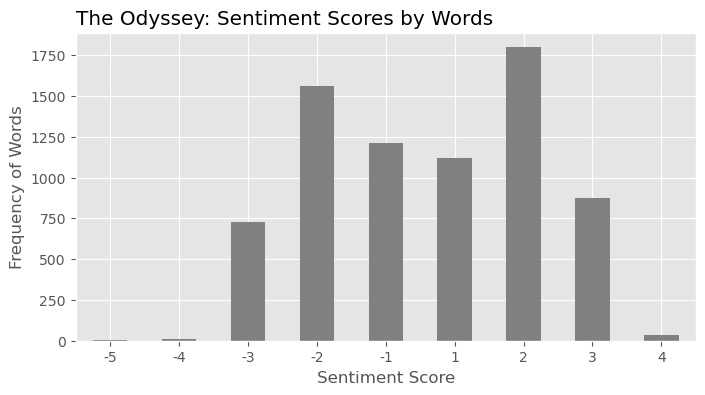

In [19]:
score_freq.plot.bar(
    legend=False,
    figsize=(8, 4),
    grid=True,
    color='gray')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency of Words')
plt.title('The Odyssey: Sentiment Scores by Words', loc='left')
plt.xticks(rotation=0);

In [17]:
score_acc = df.groupby(df['line'] // 100)\
    .score.mean()\
    .to_frame('score')\
    .rename_axis('section')

score_acc.head(10)

,score
section,
0,0.520000
1,-0.318182
2,0.291667
3,0.100000
4,-0.156250
5,0.395062
6,0.202899
7,-0.272727
8,-0.064103


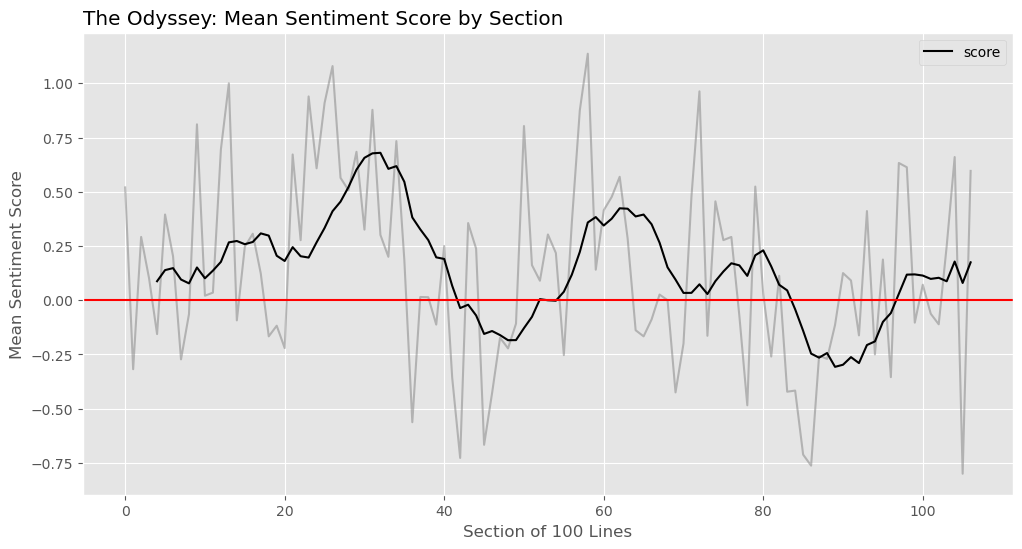

In [20]:
ax = score_acc.plot.line(legend=False, figsize=(12, 6), grid=True, alpha=0.5, color='gray')
score_acc.rolling(10, min_periods=5).mean().plot.line(ax=ax, color='black')
plt.xlabel('Section of 100 Lines')
plt.ylabel('Mean Sentiment Score')
plt.title('The Odyssey: Mean Sentiment Score by Section', loc='left')
plt.axhline(0, color='red')
plt.xticks(rotation=0);

In [34]:
adf = pd.read_csv('/Users/andy/Desktop/Data Mining Exercises/data/Aeneid.txt',sep='\t')\
    .dropna()\
    #.drop('gutenburg_id', 1)

adf.head(10)

,THE AENEID
0,by Virgil
1,Translated by John Dryden
2,Contents
3,BOOK I
4,BOOK II
5,BOOK III
6,BOOK IV
7,BOOK V
8,BOOK VI
9,BOOK VII


In [36]:
adf['line'] = range(1, len(adf) + 1)

adf.head()

,THE AENEID,line
0,by Virgil,1
1,Translated by John Dryden,2
2,Contents,3
3,BOOK I,4
4,BOOK II,5


In [37]:
def clean_text(text):
    text = text.lower()  # Convert all text to lowercase
    text = text.replace("'", '')
    text = re.sub(r'[^\w]', ' ', text)  # Leave only word characters
    text = re.sub(r'\s+', ' ', text)  # Omit extra space characters
    text = text.strip()
    return text

adf['THE AENEID'] = adf['THE AENEID'].map(clean_text) 
adf['THE AENEID'] = adf['THE AENEID'].map(word_tokenize) # Split text into word tokens

adf.head()

,THE AENEID,line
0,"[by, virgil]",1
1,"[translated, by, john, dryden]",2
2,[contents],3
3,"[book, i]",4
4,"[book, ii]",5


In [38]:
adf = adf.explode('THE AENEID').rename(columns={'THE AENEID': 'token'})

adf.head(10)

,token,line
0,by,1
0,virgil,1
1,translated,2
1,by,2
1,john,2
1,dryden,2
2,contents,3
3,book,4
3,i,4
4,book,5


In [39]:
aafinn_scorer = Afinn()

adf['score'] = adf['token'].map(afinn_scorer.score).astype(int)
adf = adf[adf['score'] != 0]

In [40]:
ascore_freq = adf.score.value_counts().sort_index().to_frame('n')+df.score.value_counts().sort_index().to_frame('n')

ascore_freq

,n
-5,3
-4,47
-3,1663
-2,4242
-1,2561
1,2464
2,3878
3,1595
4,114


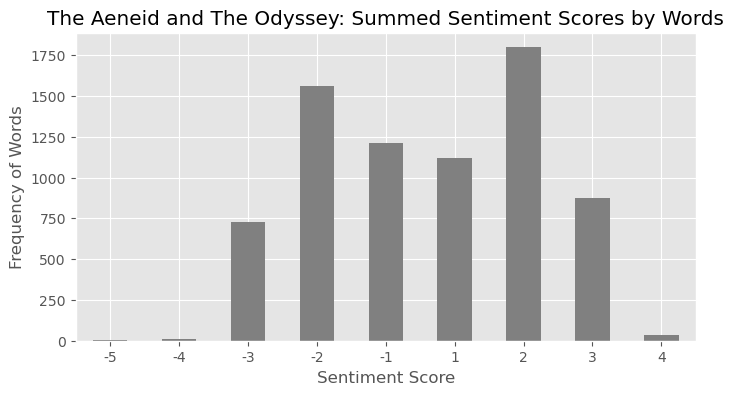

In [44]:
score_freq.plot.bar(
    legend=False,
    figsize=(8, 4),
    grid=True,
    color='gray')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency of Words')
plt.title('The Aeneid and The Odyssey: Summed Sentiment Scores by Words', loc='center')
plt.xticks(rotation=0);

In [53]:
score_acc = df.groupby(df['line'] // 100)\
    .score.mean()\
    .to_frame('score')\
    .rename_axis('section')

ascore_acc = adf.groupby(adf['line'] // 100)\
    .score.mean()\
    .to_frame('score')\
    .rename_axis('section')

score_acc.head(10)

,score
section,
0,0.520000
1,-0.318182
2,0.291667
3,0.100000
4,-0.156250
5,0.395062
6,0.202899
7,-0.272727
8,-0.064103


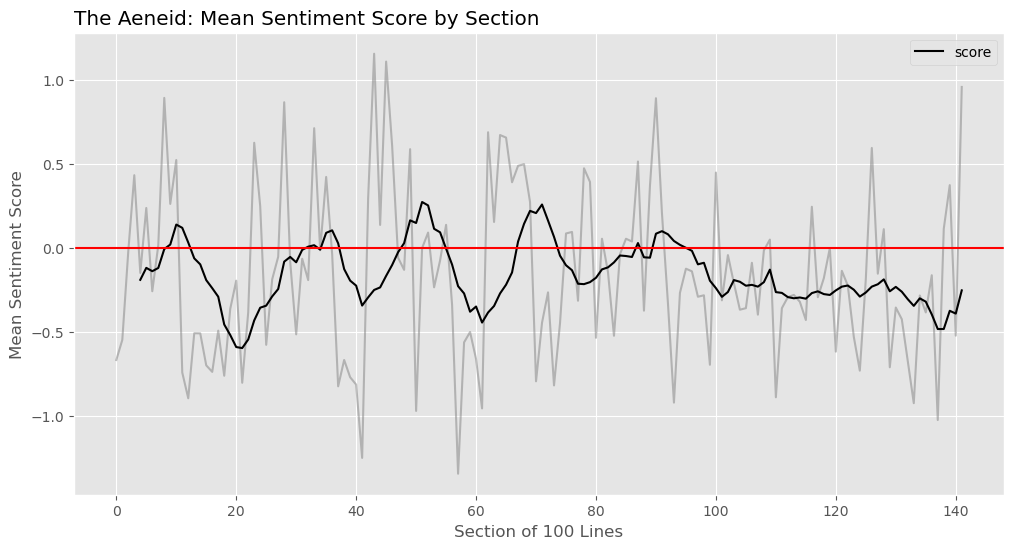

In [57]:
ax = ascore_acc.plot.line(legend=False, figsize=(12, 6), grid=True, alpha=0.5, color='gray')
ascore_acc.rolling(10, min_periods=5).mean().plot.line(ax=ax, color='black')
plt.xlabel('Section of 100 Lines')
plt.ylabel('Mean Sentiment Score')
plt.title('The Aeneid: Mean Sentiment Score by Section', loc='left')
plt.axhline(0, color='red')
plt.xticks(rotation=0);